# G2M insight for Cab Investment firm

The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Data Set:**

There are 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

# 1. Cab_Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cab_data = pd.read_csv('Cab_Data.csv')
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [ ]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [ ]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [ ]:
cab_data['Company'].nunique()

2

In [ ]:
cab_data['City'].nunique()

19

In [ ]:
cab_data.shape

(359392, 7)

In [ ]:
cab_data.duplicated().sum()

0

No duplicates

In [ ]:
cab_data['Date of Travel'].nunique()

1095

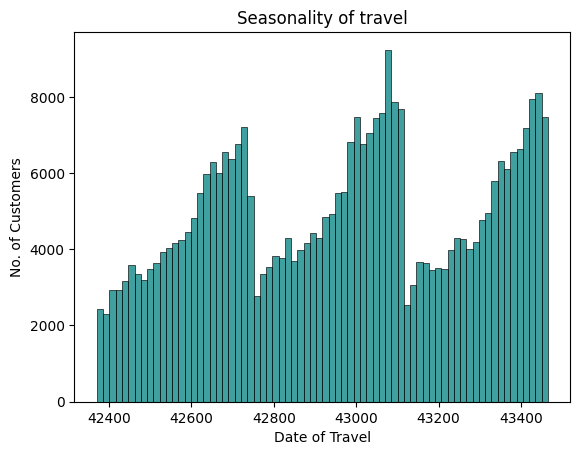

In [ ]:
plt.subplot(1,1,1)
ax = sns.histplot(cab_data["Date of Travel"], bins=72, kde=False, color='#008080')
ax.set(title = "Seasonality of travel")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Date of Travel')

plt.show()

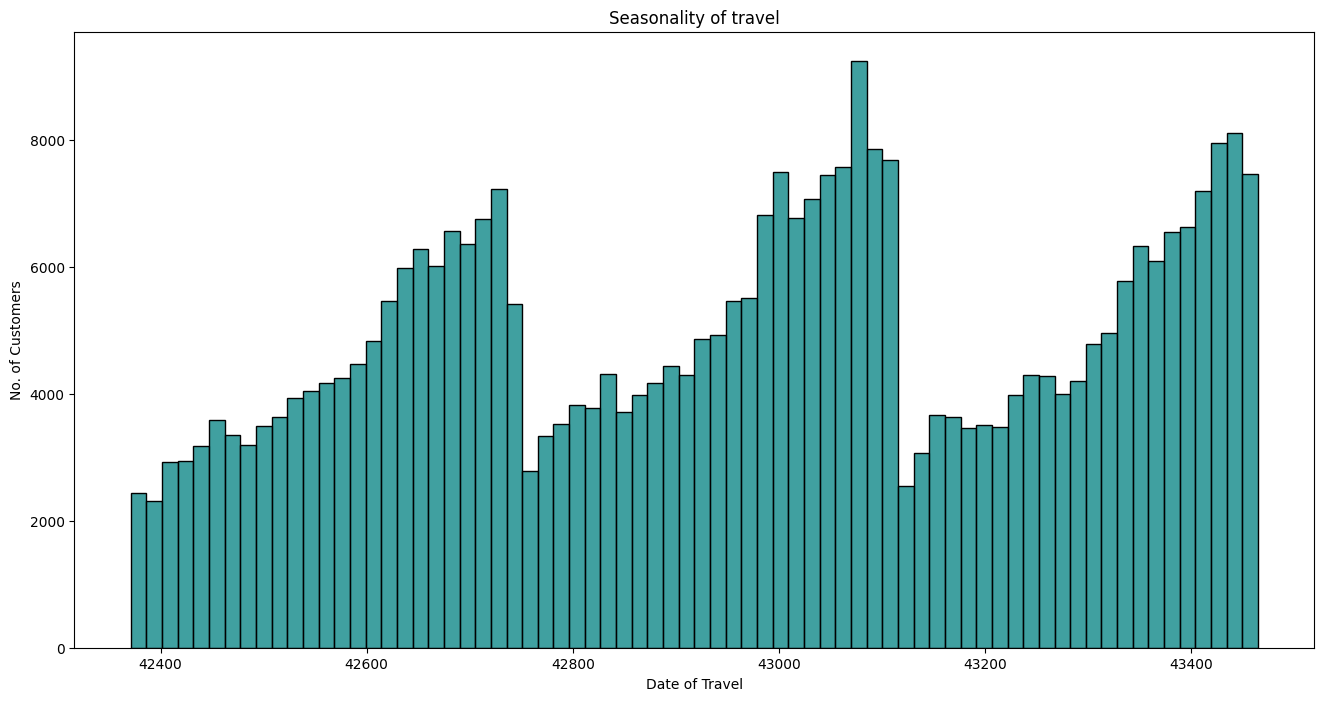

In [ ]:
plt.figure(figsize=(16, 8))

ax = sns.histplot(cab_data["Date of Travel"], bins=72, kde=False, color='#008080')
ax.set(title="Seasonality of travel")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Date of Travel')

plt.show()


In [ ]:
cab_data['Transaction_ID'] = cab_data['Transaction ID']

In [ ]:
cab_data.groupby(['Date of Travel']).Transaction_ID.count().sort_value(ascending = False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '42721'),
  Text(1, 0, '43042'),
  Text(2, 0, '43056'),
  Text(3, 0, '43063'),
  Text(4, 0, '43077'),
  Text(5, 0, '43079'),
  Text(6, 0, '43084'),
  Text(7, 0, '43086'),
  Text(8, 0, '43091'),
  Text(9, 0, '43105'),
  Text(10, 0, '43106'),
  Text(11, 0, '43414'),
  Text(12, 0, '43420'),
  Text(13, 0, '43421'),
  Text(14, 0, '43428'),
  Text(15, 0, '43442'),
  Text(16, 0, '43448'),
  Text(17, 0, '43449'),
  Text(18, 0, '43455'),
  Text(19, 0, '43456')])

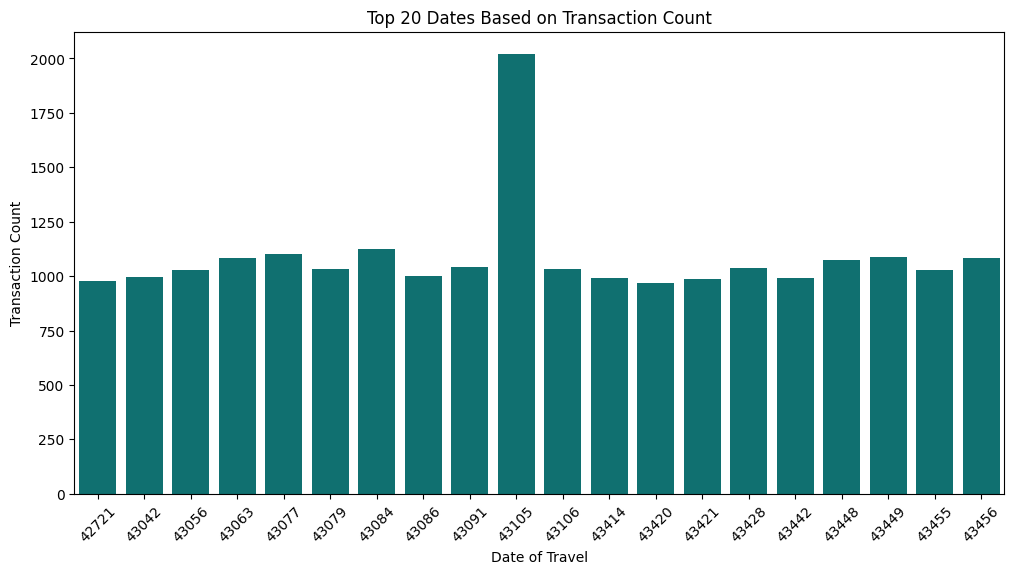

In [ ]:
date_counts = cab_data.groupby(['Date of Travel']).Transaction_ID.count().sort_values(ascending=False)

# Display the first 20 values
top_20_dates = date_counts.head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_20_dates.index, y=top_20_dates.values, color='#008080')
ax.set(title="Top 20 Dates Based on Transaction Count", xlabel='Date of Travel', ylabel='Transaction Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

The dates of travel were encoded into a new form. Most customers use cabs seasonally. From the dates before 42400, the use of cabs increase gradually upto date 42721 where it drops sharply.
After that the use of cabs start increasing again gradually. The use peaks again at date 43105 after which it drops drastically.
The cycle repeats again and increases up to date 43456.
It can be concluded that peak dates for cab activity are around 42271, 43105 and 43456

<Axes: >

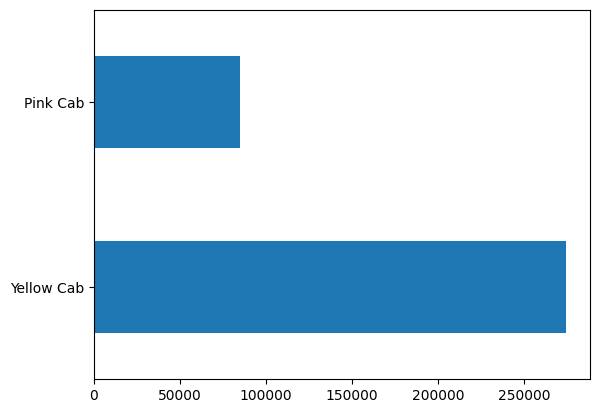

In [ ]:
cab_data["Company"].value_counts().plot(kind = 'barh')

In [ ]:
cab_data.groupby('Company').Transaction_ID.count()

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64

Most customers prefer using the Yellow Cab

In [ ]:
cab_data.groupby('City').Transaction_ID.count().sort_values(ascending = False)

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: Transaction_ID, dtype: int64

<Axes: >

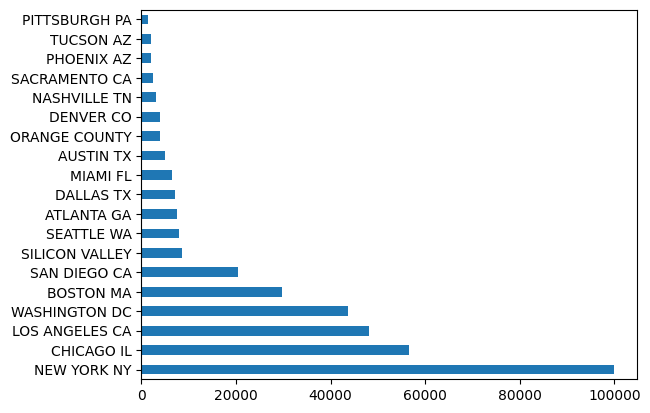

In [ ]:
cab_data["City"].value_counts().plot(kind = 'barh')

Most cab usage is found New York City with 99885 customers. Chicago IL follows by 56625 customers.
Silicon Valley, Seattle WA, Atlanta GA, Dallas TX, Miami FL, Austin TX, Orange County, Denver CO, Nashville TN, Sacramento CA, Pittsburg PA, Tucson Az, and Phoenix AZ have the lowest cab usage.

<Axes: xlabel='KM Travelled', ylabel='Price Charged'>

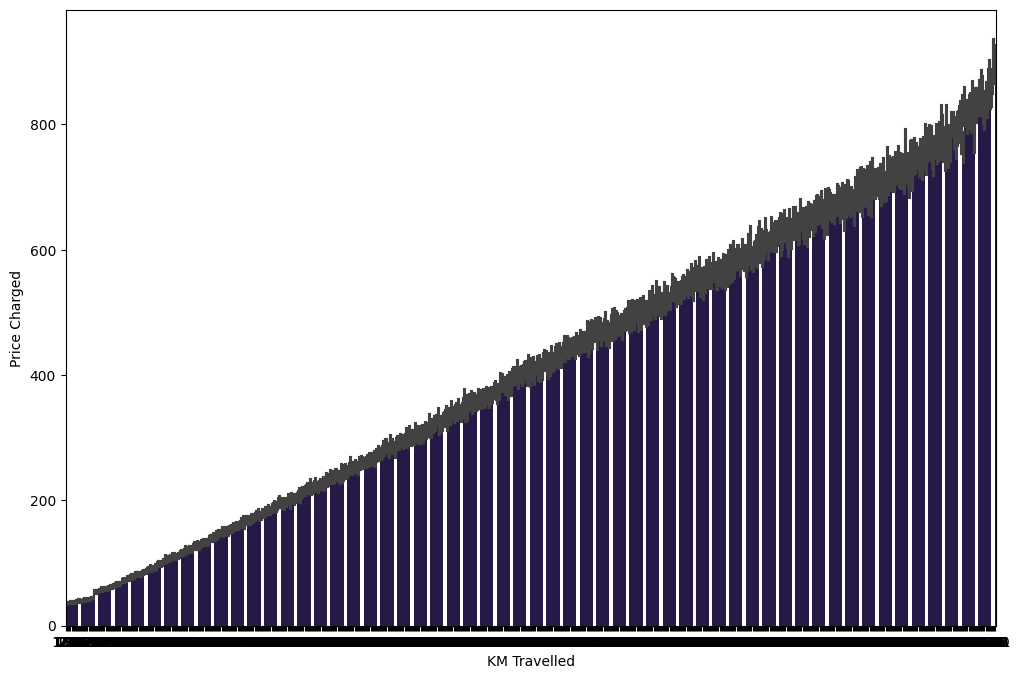

In [ ]:
plt.figure(figsize =(12,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x = 'KM Travelled', y = 'Price Charged', data = cab_data, color = color_palette)

<ipython-input-75-cd28a8619bc8>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KM Bins', y='Price Charged', data=cab_data, color=color_palette, ci=None)


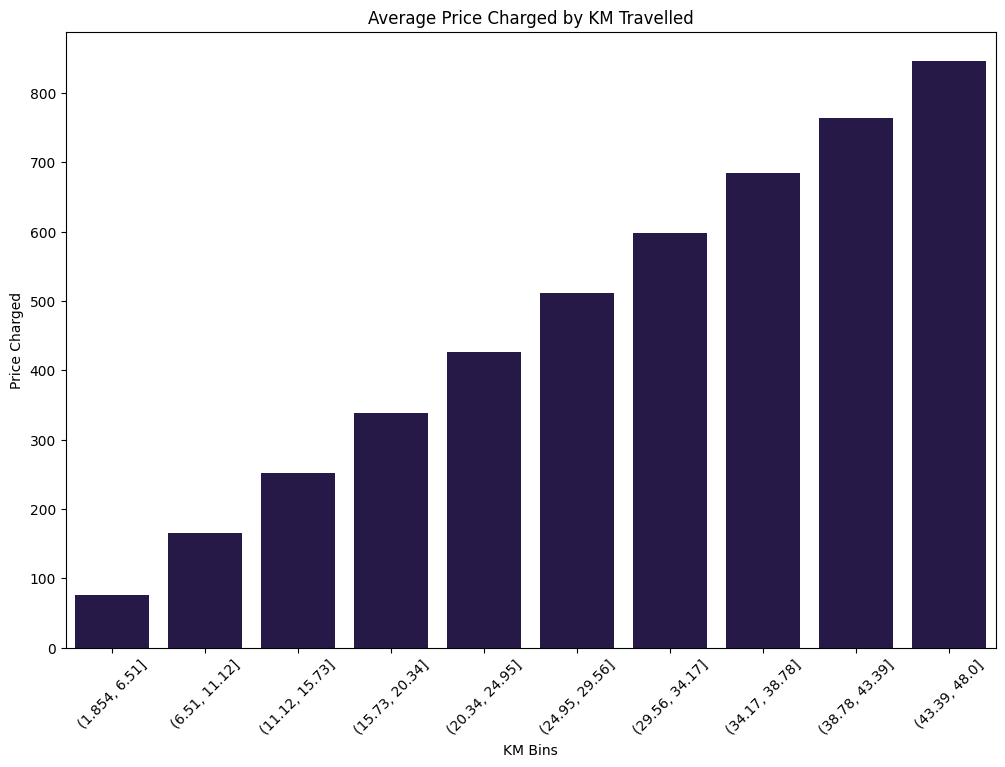

In [ ]:

cab_data['KM Bins'] = pd.cut(cab_data['KM Travelled'], bins=10)
plt.figure(figsize=(12, 8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='KM Bins', y='Price Charged', data=cab_data, color=color_palette, ci=None)
plt.xticks(rotation=45)
plt.title('Average Price Charged by KM Travelled')
plt.show()


Price charged increases with KM Travelled

<ipython-input-78-72befc3c4544>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KM Travelled', y='Cost of Trip', data=cab_data, color=color_palette, ci=None)


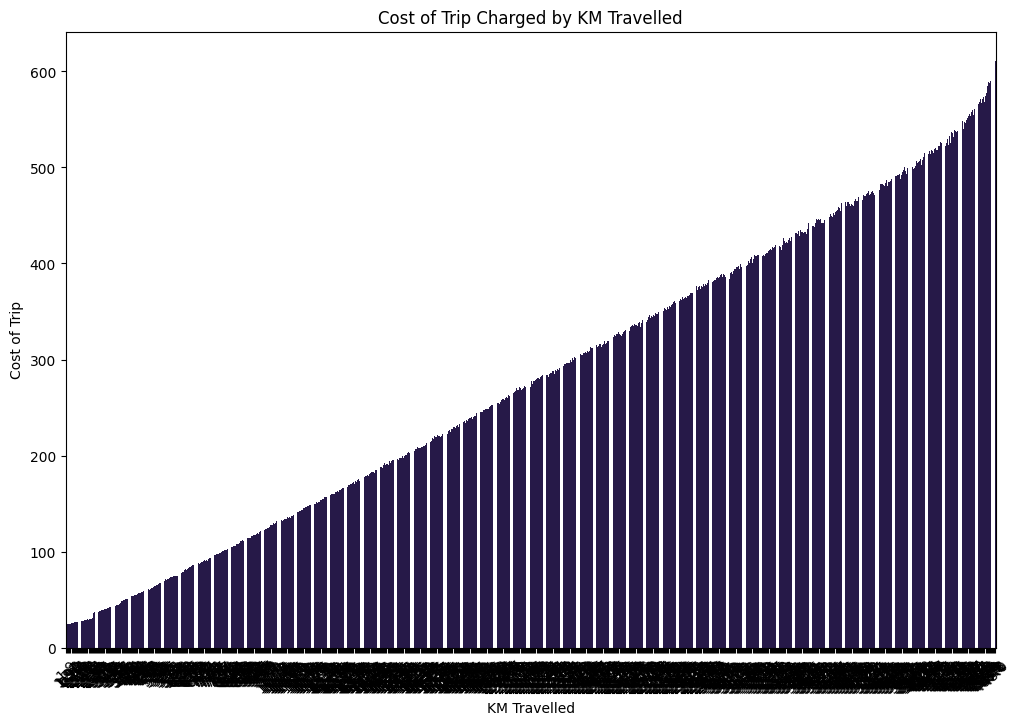

In [ ]:
plt.figure(figsize=(12, 8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='KM Travelled', y='Cost of Trip', data=cab_data, color=color_palette, ci=None)
plt.xticks(rotation=45)
plt.title('Cost of Trip Charged by KM Travelled')
plt.show()

Cost of Trip increases with KM Travelled

# 2. City Data


In [ ]:
city = pd.read_csv('City.csv')
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
city['Population'] = city['Population'].str.replace(',', '').astype(float)
city['Users'] = city['Users'].str.replace(',', '').astype(float)
city.head()

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


In [ ]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  0 non-null      float64
 2   Users       0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


<Axes: xlabel='City', ylabel='Users'>

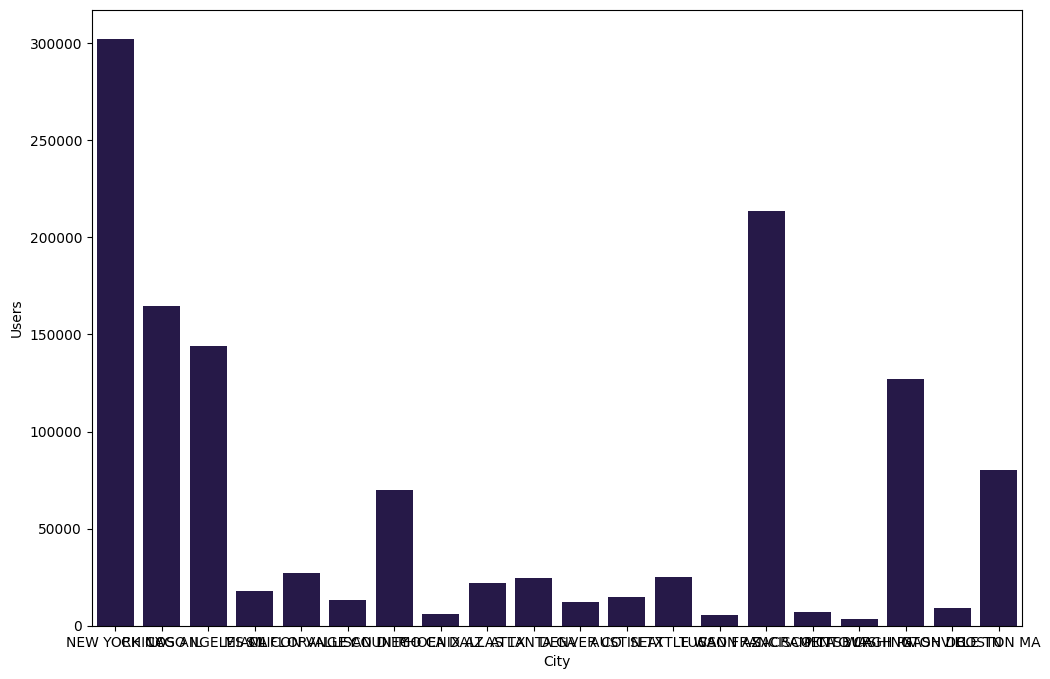

In [ ]:
plt.figure(figsize =(12,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x = 'City', y = 'Users', data = city, color = color_palette)

In [ ]:

# Sort the Cities by 'Users' in descending order
city.sort_values(by='Users', ascending=False)

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
14,SAN FRANCISCO CA,629591.0,213609.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
17,WASHINGTON DC,418859.0,127001.0
19,BOSTON MA,248968.0,80021.0
6,SAN DIEGO CA,959307.0,69995.0
4,SILICON VALLEY,1177609.0,27247.0
12,SEATTLE WA,671238.0,25063.0
9,ATLANTA GA,814885.0,24701.0


New York city has the highest number of cab users, Pittsburg PA the least

<Axes: xlabel='City', ylabel='Population'>

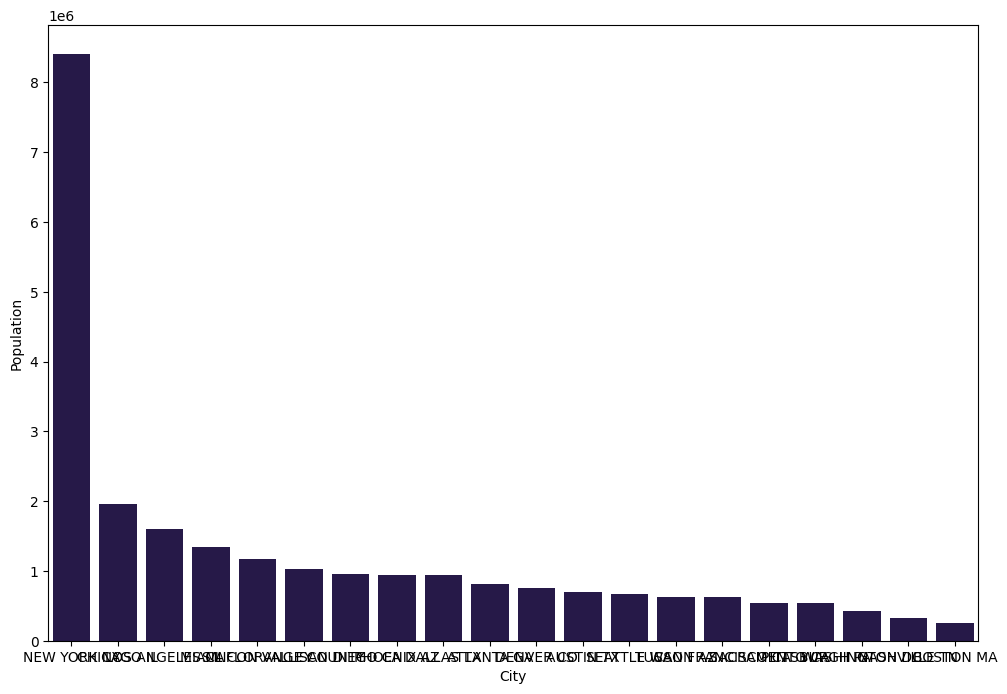

In [ ]:
plt.figure(figsize =(12,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x = 'City', y = 'Population', data = city, color = color_palette)

New york has the highest population, Boston MA the least

<ipython-input-122-cc47ad761118>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Population', y='Users', data=city, color=color_palette, ci=None)


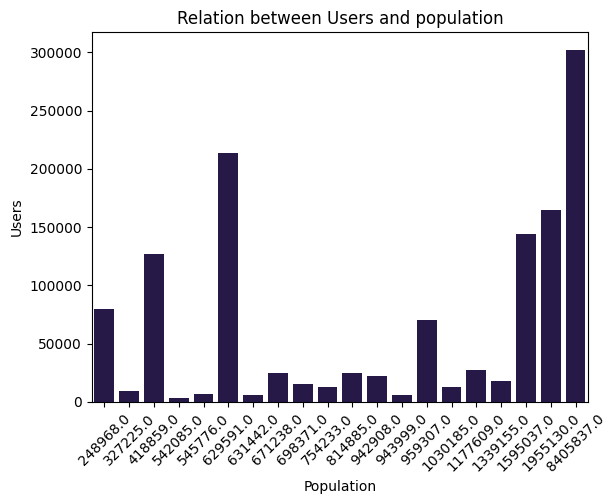

In [ ]:
sns.barplot(x='Population', y='Users', data=city, color=color_palette, ci=None)
plt.xticks(rotation=45)
plt.title('Relation between Users and population')
plt.show()



There is no direct relationship between the number of cab users and the population of the city, save for the three most populated cities.
The cities with the most cab usage are Boston MA, Washington DC, San Fransisco CA, San Diego CA, Los Angeles CA, Chicago IL, New York NY

# 3. Transaction Data


In [2]:
transaction = pd.read_csv('Transaction_ID.csv')
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [3]:
transaction['Transaction ID'].nunique()

440098

In [4]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

No missing values

In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [7]:
transaction.duplicated().sum()

0

No duplicates

In [ ]:
transaction['Customer ID'].nunique()

49171

Customers use both cards and cash as modes of payment

In [ ]:
transaction['Transaction_ID'] = transaction['Transaction ID']

In [ ]:
transaction.groupby(['Customer ID','Payment_Mode']).Transaction_ID.count()

Customer ID  Payment_Mode
1            Card            18
             Cash            11
2            Card            25
             Cash            15
3            Card            30
                             ..
59998        Cash             4
59999        Card             4
             Cash             4
60000        Card             9
             Cash             9
Name: Transaction_ID, Length: 80703, dtype: int64

<Axes: >

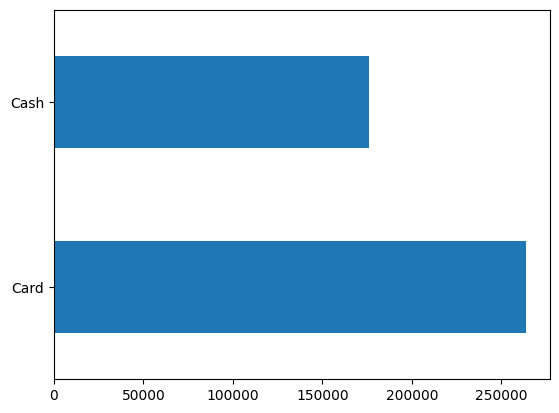

In [8]:
#Visualization of the distribution of the payment method
transaction["Payment_Mode"].value_counts().plot(kind = 'barh')

Most customers pay using card.

# 4. Customer_ID Dataset


In [9]:
Customer = pd.read_csv('Customer_ID.csv')
Customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [13]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
 4   Customer_ID         49171 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.9+ MB


No missing values

In [14]:
Customer.duplicated().sum()

0

No duplicates

In [11]:
Customer['Customer_ID'] = Customer['Customer ID']

<Axes: >

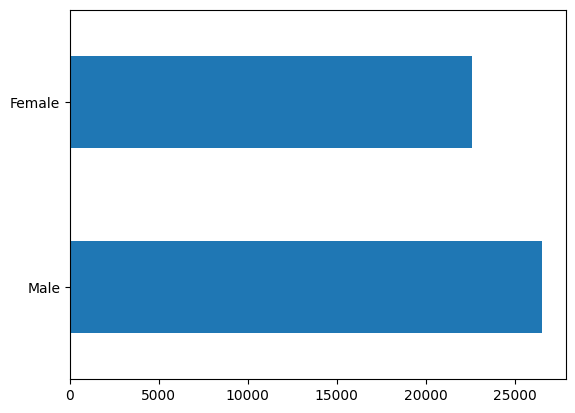

In [10]:
#Distribution of Gender
Customer["Gender"].value_counts().plot(kind = 'barh')

In [12]:
Customer.groupby('Gender').Customer_ID.count()

Gender
Female    22609
Male      26562
Name: Customer_ID, dtype: int64

More males use cabs than females by 4000

In [16]:
Customer['Income'] = Customer['Income (USD/Month)']

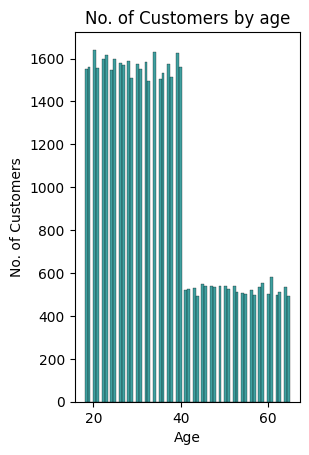

In [ ]:
#Distribution of customers by age
plt.subplot(1,2,2)
ax = sns.histplot(Customer["Age"], bins=72, kde=False, color='#008080')
ax.set(title = "No. of Customers by age")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Age')

plt.show()

In [19]:
Customer.groupby(['Age']).Customer_ID.count().sort_values(ascending=False)

Age
20    1641
34    1629
39    1624
23    1615
25    1597
22    1596
28    1588
32    1585
26    1577
37    1575
30    1573
27    1571
19    1561
40    1561
21    1554
18    1551
31    1549
24    1547
36    1534
38    1512
29    1511
35    1503
33    1495
61     580
59     552
45     551
46     540
47     539
49     539
52     539
50     538
58     536
64     536
48     533
43     532
42     526
51     525
41     523
56     521
63     512
53     510
54     506
55     504
60     501
57     498
62     497
44     492
65     492
Name: Customer_ID, dtype: int64

Generally younger people (from 19 years up to 40 years) prefer using cabs than older people (40 years up to 65)

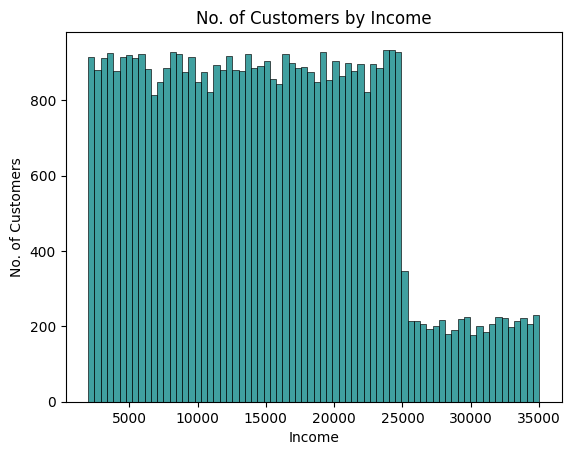

In [ ]:
#Distribution of Customers by income
plt.subplot(1,1,1)
ax = sns.histplot(Customer["Income (USD/Month)"], bins=72, kde=False, color='#008080')
ax.set(title = "No. of Customers by Income")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Income')

plt.show()

Customers with an income of less than 25000 dollars are more than Customers with an income of between 25000 dollars and 35000 dollars